# Maximum Entropy for reconstructing a function from its moments

In this notebook we  use Maximum Entropy, as formulated by Mead and Papanicolaou, J. Math. Phys. 24, 2404 (1984), to reconstruct some simple functions from their moments. 

Written by DP and RJF, June 2019. 

## Import functions

In [1]:
%matplotlib inline

In [2]:
import numpy as np

import scipy.stats as stats
from scipy.stats import norm, uniform

from scipy.optimize import minimize

import scipy.integrate as integrate

import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox, Button
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 

from IPython.display import display

import seaborn as sns
sns.set()
sns.set_context("talk")

## Define the functions we will need

In [3]:
def Boltzman(x, lambdas):
    """
    Defines the "Boltzman factor".  The Lagrange multiplier array lambdas
    can be any size. 
    """
    return np.exp( -np.sum( [ lambdas[i] * x**(i+1) 
                              for i in range(len(lambdas)) ] 
                          ) 
                 )

In [4]:
def Z(lambdas):
    """
    Defines the partition function.
    Note shift in index because of way Python subscripts arrays.
    Using quad from scipy.integrate.
    """
    return integrate.quad(Boltzman, 0., 1., args=lambdas, epsrel=1.e-16)[0]

In [5]:
def EffectivePotential(lambdas, mus):
    """
    Defines the effective potential.
    lambdas and mus must be numpy arrays.
    """
    return np.log( Z(lambdas) ) + mus @ lambdas 

In [6]:
def Px(x_pts, lambdas):
    """
    MaxEnt estimate for polynomial P(x).  
    Takes a numpy array x_pts and the vector lambdas as input.
    """
    norm = integrate.quad(Boltzman, 0., 1., lambdas, 
                          epsrel=1.e-14)[0]
    return [Boltzman(x, lambdas) / norm for x in x_pts]

## Minimize the effective potential and plot results for benchmark case

First, as a benchmark, we consider the function $y(x)=x + 1/2$

In [7]:
def y_true(x_pts):
    """Simple test function: y = x + 1/2"""
    return 0.5 + x_pts

In [8]:
def lambdas_min(mus):
    """Minimize the effective potential with respects to the lambdas,
       given an array of mu values (mus).
       We need to specify a small tolerance (tol) to ensure the output
       from minimize is sufficiently precise.
       At high orders this seems to have trouble converging to the best
       minimum.  Sensitive to where one starts and the method.
    """
    lambdas0 = np.ones(len(mus))  # start the minimization with all ones
    res = minimize(EffectivePotential, lambdas0, args=mus)
    return np.array(res.x)

def plot_lines(mus):
    x_pts = np.linspace(0, 1, 301)   # mesh for plots (enough so smooth)
    y_reconstruct = Px(x_pts, lambdas_min(mus))

    font_size = 18
    plt.rcParams.update({'font.size': font_size})
    
    fig = plt.figure(figsize=(12,6))

    ax = fig.add_subplot(1,2,1)
    ax.plot(x_pts, y_reconstruct, label="MaxEnt reconstruction", color="blue")
    ax.plot(x_pts, y_true(x_pts), label="True function", color="red")
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.legend()

    ax2 = fig.add_subplot(1,2,2)
#     ax2.plot(x_pts, y_true(x_pts) - y_reconstruct, 
#             label="residual", color="blue")
    ax2.plot(x_pts, y_reconstruct / y_true(x_pts), 
            label="Ratio reconstucted/true", color="blue")
    ax2.set_xlabel(r'$x$')
    ax2.set_ylabel(r'$y$')
    ax2.legend()

    fig.tight_layout()    

### N=2 moments

[-1.58929435  0.5349939 ]


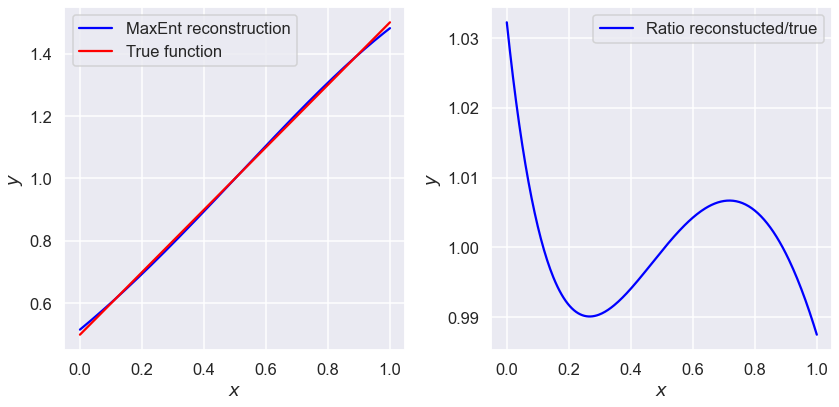

In [9]:
mus2=np.array([7/12, 5/12])
plot_lines(mus2)
print(lambdas_min(mus2))

### N=3 moments

[-1.84592715  1.13225948 -0.38053977]


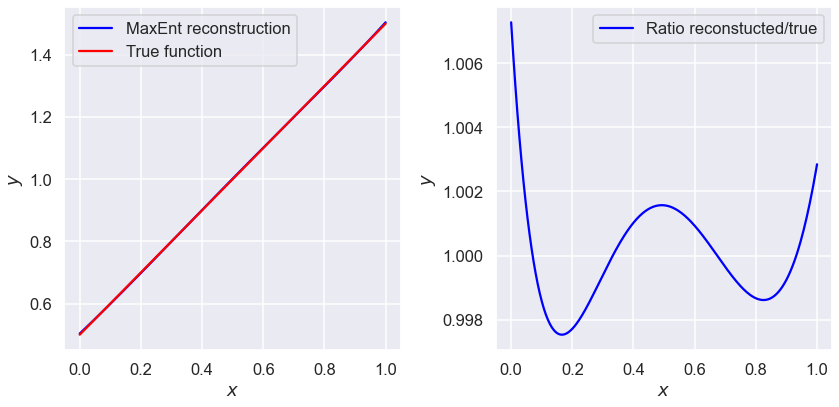

In [10]:
mus3=np.array([7/12, 5/12, 13/40])
plot_lines(mus3)
print(lambdas_min(mus3))

### N=4 moments

[-1.69938343  0.54748383  0.45575856 -0.39282553]


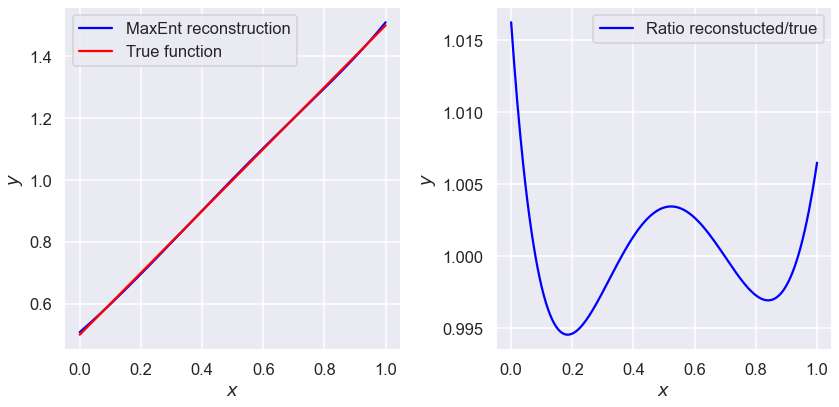

In [11]:
mus4=np.array([7/12, 5/12, 13/40, 4/15])
plot_lines(mus4)
print(lambdas_min(mus4))

#### N=5 moments

[-1.57580954  0.2306594   0.48945464  0.13621721 -0.36345217]


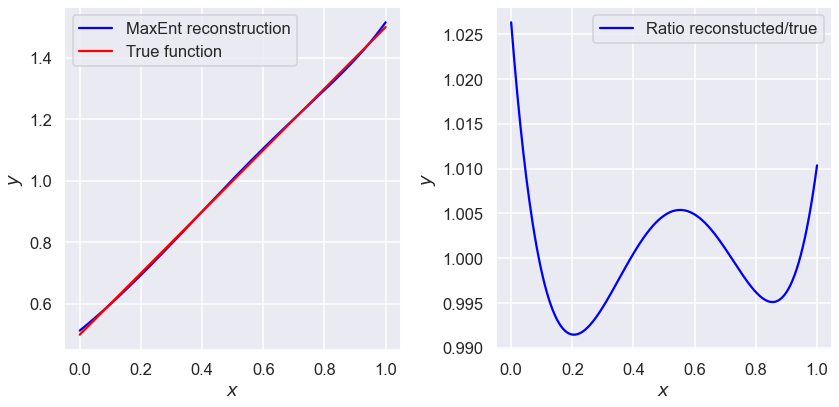

In [12]:
mus5=np.array([7/12, 5/12, 13/40, 4/15, 19/84])
plot_lines(mus5)
print(lambdas_min(mus5))

### Benchmark case: questions

Does the result improve from N=2 to N=3? From N=3 to N=4? From N=4 to N=5?

In [13]:
print('At N=4, minimum found is:',EffectivePotential(lambdas_min(mus4),mus4),',but there is also:',EffectivePotential(np.array([-1.945,1.550,-1.004,0.3025]),mus4))

At N=4, minimum found is: -0.04278640499674846 ,but there is also: -0.04279159257882259


How could you persuade python to find this slightly better minimum?

What do you need to do at N=5 to find the minimum? (Which, for the record, is at: $\lambda=\{-1.9811,1.7898,-1.6147,0.96602,-0.25839\}$.)

## Trying a different function

Now use the functions defined and refined (by you!) above to produce a MaxEnt reconstruction of $y(x)=2x$. 

## Yet another function 

MaxEnt doesn't even care about essential singularities. Compute the moments for  $y(x)=1/\mu_0 \exp(-1/x)$ and reconstruct it. Note that you need to choose the constant $\mu_0$ so that $y$ can be interpreted as a probability distribution. 

## What failure looks like 

MaxEnt does care about some things, though. Do the same thing for $P(x)=4x-1$ and see what happens.

Can you work out why MaxEnt failed here?